# Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


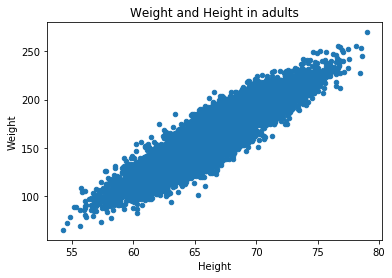

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

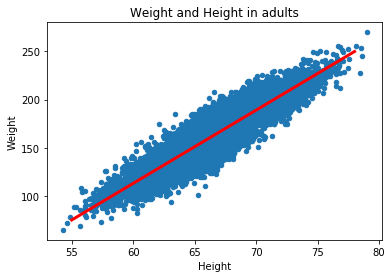

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [20]:
yhat = line(x, w=0, b=0)

In [21]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

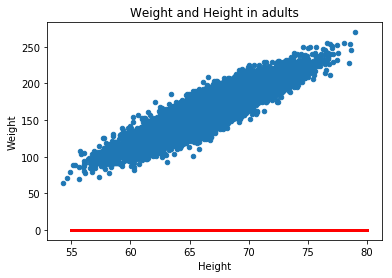

In [22]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [23]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [24]:
X = df[['Height']].values
y_true = df['Weight'].values

In [25]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [53]:
y_pred = line(X, w=1.7, b=50)

In [54]:
y_pred

array([[ 175.53992893],
       [ 166.92923688],
       [ 175.98717917],
       ..., 
       [ 158.57558676],
       [ 167.35821332],
       [ 155.305218  ]])

In [55]:
mean_squared_error(y_true, y_pred.ravel())

687.15715427526629

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

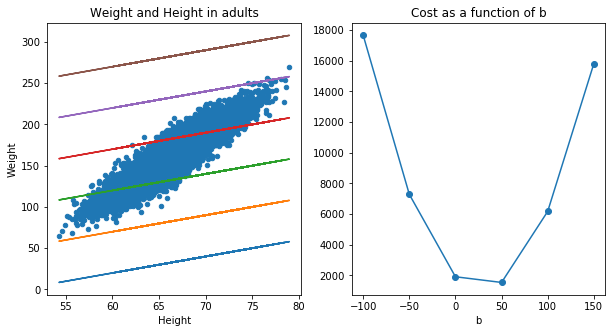

In [56]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [58]:
model = Sequential()

In [59]:
model.add(Dense(1, input_shape=(1,)))

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [62]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 637.9148     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 537.1382     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 488.3484     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 430.4953     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 375.0331     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 354.0201     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 318.4547     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 289.8880     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 269.3199     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 234.1998     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 217.6806     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 217.4927     
E

In [63]:
y_pred = model.predict(X)

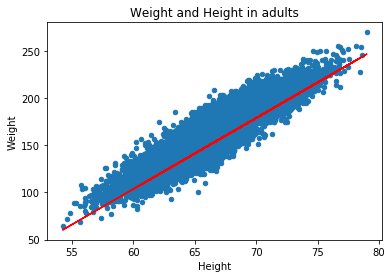

In [64]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [65]:
W, B = model.get_weights()

In [66]:
W

array([[ 7.54523182]], dtype=float32)

In [67]:
B

array([-349.19628906], dtype=float32)

## Evaluating Model Performance

In [83]:
from sklearn.metrics import r2_score

In [69]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.760


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [72]:
len(X_train)

8000

In [73]:
len(X_test)

2000

In [74]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [75]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [77]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [20]:
from sklearn.metrics import mean_squared_error as mse

In [79]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	154.7
The Mean Squared Error on the Test set is:	149.8


In [80]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.849
The R2 score on the Test set is:	0.859


# Classification

In [3]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [4]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


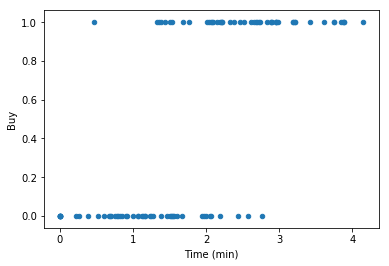

In [5]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [9]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 1.2412 - acc: 0.3300     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.6741 - acc: 0.4700     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.6610 - acc: 0.5300     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.6025 - acc: 0.7400     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5796 - acc: 0.6600     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.5367 - acc: 0.7400     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.5212 - acc: 0.7400     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.5109 - acc: 0.7700     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4996 - acc: 0.7800     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.5000 - acc: 0.7400     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4699 - acc: 0.8200   

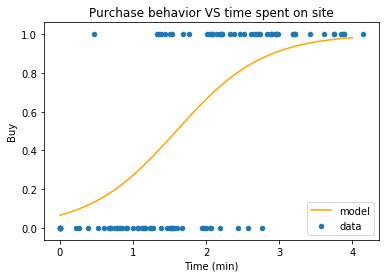

In [12]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [13]:
temp_class = model.predict(temp) > 0.5

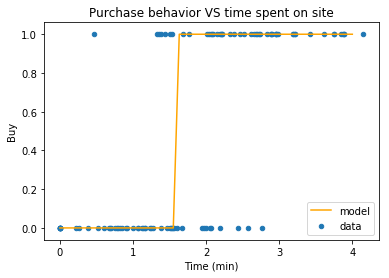

In [14]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [15]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [23]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [24]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [25]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.800
The test accuracy score is 0.900


## Cross Validation

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier

In [27]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [34]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [35]:
from sklearn.model_selection import cross_val_score, KFold

In [36]:
cv = KFold(3, shuffle=True)

In [37]:
scores = cross_val_score(model, X, y, cv=cv)

In [38]:
scores

array([ 0.73529412,  0.84848485,  0.84848485])

In [39]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8108 ± 0.0534


## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y, y_class_pred)

array([[39, 11],
       [ 7, 43]])

In [42]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [43]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,39,11
Buy,7,43


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.796
Recall:  	0.860
F1 Score:	0.827


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.85      0.78      0.81        50
          1       0.80      0.86      0.83        50

avg / total       0.82      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [48]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [49]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [50]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [51]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [52]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


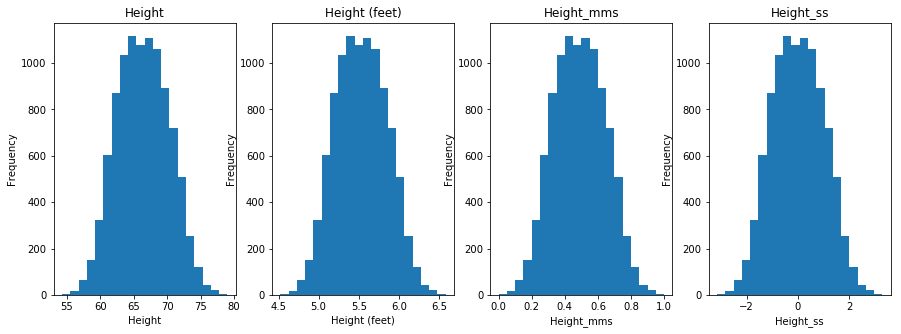

In [56]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature, bins=20)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [135]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


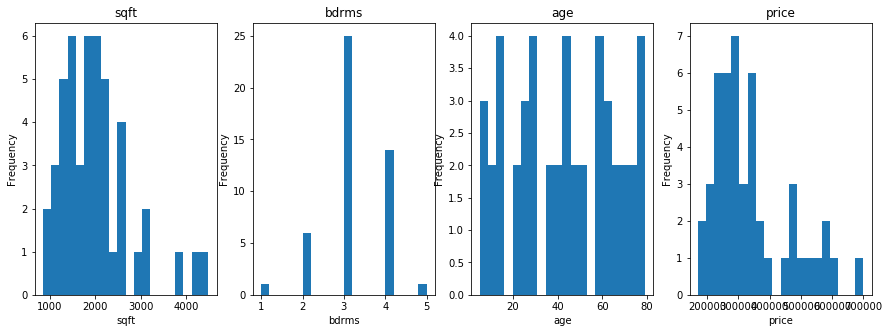

In [136]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature, bins=20)
    plt.xlabel(feature)

In [137]:
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [140]:
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
37/37 [==============================] - 0s - loss: 131241929755.6757     
Epoch 2/40
37/37 [==============================] - 0s - loss: 128836066663.7838     
Epoch 3/40
37/37 [==============================] - 0s - loss: 126432696375.3513     
Epoch 4/40
37/37 [==============================] - 0s - loss: 124102516957.4054     
Epoch 5/40
37/37 [==============================] - 0s - loss: 121681730698.3784     
Epoch 6/40
37/37 [==============================] - 0s - loss: 119342838313.5135     
Epoch 7/40
37/37 [==============================] - 0s - loss: 117003328650.3784     
Epoch 8/40
37/37 [==============================] - 0s - loss: 114690069254.9189     
Epoch 9/40
37/37 [==============================] - 0s - loss: 112421899955.8919     
Epoch 10/40
37/37 [==============================] - 0s - loss: 110192640442.8108     
Epoch 11/40
37/37 [==============================] - 0s - loss: 107955605171.8919     
Epoch 12/40
37/37 [==============================] -

In [141]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	54540924100.1
The Mean Squared Error on the Test set is:	61367321271.4


In [144]:
ss = StandardScaler()
X_stdnorm = ss.fit_transform(X)
y_stdnorm = ss.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_stdnorm, y_stdnorm, test_size=0.2)
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=40)
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

/Users/davidmcginnis/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/davidmcginnis/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/davidmcginnis/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECA

Epoch 1/40
37/37 [==============================] - 0s - loss: 1.5262     
Epoch 2/40
37/37 [==============================] - 0s - loss: 1.3082     
Epoch 3/40
37/37 [==============================] - 0s - loss: 1.5069     
Epoch 4/40
37/37 [==============================] - 0s - loss: 1.2535     
Epoch 5/40
37/37 [==============================] - 0s - loss: 0.4000     
Epoch 6/40
37/37 [==============================] - 0s - loss: 0.6128     
Epoch 7/40
37/37 [==============================] - 0s - loss: 0.7822     
Epoch 8/40
37/37 [==============================] - 0s - loss: 0.5585     
Epoch 9/40
37/37 [==============================] - 0s - loss: 0.3417     
Epoch 10/40
37/37 [==============================] - 0s - loss: 0.7027     
Epoch 11/40
37/37 [==============================] - 0s - loss: 0.7915     
Epoch 12/40
37/37 [==============================] - 0s - loss: 0.4958     
Epoch 13/40
37/37 [==============================] - 0s - loss: 0.2787     
Epoch 14/40
37/37 [==

In [145]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.480
The R2 score on the Test set is:	0.549


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [187]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [188]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [224]:
dumbPred = 0 * df['left']
print("The dumb prediction on the all data is:\t{:0.3f}".format(accuracy_score(df['left'], dumbPred)))
print("The dumb prediction on the all data is:\t{:0.3f}".format(r2_score(df['left'], dumbPred)))

The dumb prediction on the all data is:	0.762
The dumb prediction on the all data is:	-0.312


In [199]:
df['average_montly_hours'] = df['average_montly_hours'] / 100.0

In [200]:
withOneHotNotation = pd.get_dummies(df, columns=['salary', 'sales'])

In [201]:
withOneHotNotation.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,1.57,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,2.62,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,2.72,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,2.23,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,1.59,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [202]:
X = withOneHotNotation.drop('left', axis=1).values
y = withOneHotNotation['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [203]:
withOneHotNotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null float64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary_high              14999 non-null uint8
salary_low               14999 non-null uint8
salary_medium            14999 non-null uint8
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_suppo

In [220]:
def createModel():
    model = Sequential()
    model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
    model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = createModel()
model.fit(X_train, y_train, epochs=20)
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()
print("The Train accuracy score is {:0.3f}".format(accuracy_score(y_train, y_train_pred > 0.5)))
print("The Test accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_pred > 0.5)))
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

Epoch 1/20
11999/11999 [==============================] - 1s - loss: 0.8054 - acc: 0.7200     
Epoch 2/20
11999/11999 [==============================] - 0s - loss: 0.7098 - acc: 0.7398     
Epoch 3/20
11999/11999 [==============================] - 0s - loss: 0.6806 - acc: 0.7484     
Epoch 4/20
11999/11999 [==============================] - 0s - loss: 0.6414 - acc: 0.7517     
Epoch 5/20
11999/11999 [==============================] - 0s - loss: 0.6531 - acc: 0.7496     
Epoch 6/20
11999/11999 [==============================] - 0s - loss: 0.6161 - acc: 0.7601     
Epoch 7/20
11999/11999 [==============================] - 0s - loss: 0.6147 - acc: 0.7626     
Epoch 8/20
11999/11999 [==============================] - 0s - loss: 0.6539 - acc: 0.7487     
Epoch 9/20
11999/11999 [==============================] - 0s - loss: 0.6470 - acc: 0.7516     
Epoch 10/20
11999/11999 [==============================] - 0s - loss: 0.6020 - acc: 0.7604     
Epoch 11/20
11999/11999 [========================

In [221]:
y_pred = model.predict(X) > 0.5
print(classification_report(y, y_pred))
pretty_confusion_matrix(y, y_pred, ['Not Leaving', 'Leaving'])

             precision    recall  f1-score   support

          0       0.78      0.98      0.86     11428
          1       0.56      0.10      0.17      3571

avg / total       0.73      0.77      0.70     14999



,Predicted Not Leaving,Predicted Leaving
Not Leaving,11148,280
Leaving,3211,360


In [222]:
model = KerasClassifier(build_fn=createModel,
                        epochs=25,
                        verbose=0)
cv = KFold(5, shuffle=True)
cross_val_score(model, X, y, cv=cv)

array([ 0.80633333,  0.79733333,  0.79366667,  0.75033333,  0.76292097])